In [4]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
#from google.drive import drive
import zipfile
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt

In [6]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [7]:
from tensorflow.keras import layers

# Data

In [14]:
cols = ["sentiment", "id", "date", "query", "user", "text"]

In [15]:
train_data = pd.read_csv("trainingandtestdata/train.csv", header=None, engine="python", encoding="latin1", names=cols)

In [16]:
train_data.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
train_data.shape

(1600000, 6)

In [18]:
train_data["sentiment"].unique()

array([0, 4])

In [19]:
train_data["sentiment"].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

/home/marlon/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


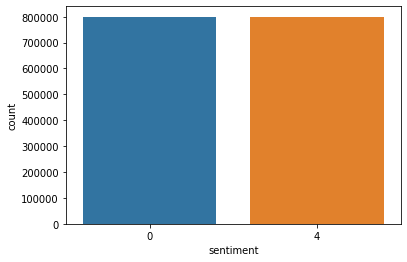

In [21]:
sns.countplot(train_data["sentiment"]);

In [22]:
test_data = pd.read_csv("trainingandtestdata/test.csv", header=None, engine="python", encoding="latin1", names=cols)

In [23]:
test_data.head()

,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [24]:
test_data["sentiment"].value_counts()

4    182
0    177
2    139
Name: sentiment, dtype: int64

/home/marlon/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


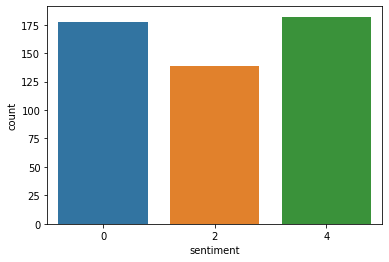

In [26]:
sns.countplot(test_data["sentiment"]);

## Limpeza dos Dados

In [27]:
data = train_data

In [29]:
data.drop(["id", "date", "query", "user"], axis=1, inplace=True)

In [30]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [31]:
X = data.iloc[:, 1].values

In [35]:
X.shape

(1600000,)

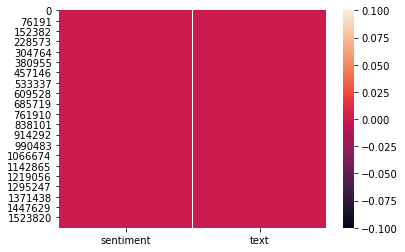

In [40]:
sns.heatmap(data.isnull());

In [43]:
data.isnull().sum()

sentiment    0
text         0
dtype: int64

In [44]:
y = data.iloc[:, 0].values

In [46]:
y.shape

(1600000,)

In [47]:
from sklearn.model_selection import train_test_split

In [50]:
X, _, y, _ = train_test_split(X, y, test_size=0.85, stratify=y)

In [51]:
X.shape

(240000,)

In [52]:
y.shape

(240000,)

In [55]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 4]), array([120000, 120000]))

In [102]:
def clean_tweets(tweet):
    tweet = BeautifulSoup(tweet, "lxml").get_text()
    tweet = re.sub(r"@[A-Za-z0-9]+", " ", tweet)
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", " ", tweet)
    tweet = re.sub(r"[^a-zA-Z.!?]", " ", tweet)
    tweet = re.sub(r" +", " ", tweet)
    return tweet

In [103]:
text = "@ddubsbostongirl http://fiap.com.br me of 2course!!!"

In [104]:
text = clean_tweets(text)
text

' me of course!!!'

In [109]:
nlp = sp.load('en_core_web_sm')

In [110]:
nlp

In [111]:
stop_words = sp.lang.en.STOP_WORDS

In [113]:
print(stop_words)

{'anyone', 'made', 'becomes', 'thru', 'yourself', 'sometime', 'unless', 'has', 'latter', 'often', 'when', 'upon', 'us', 'to', 'why', 'here', 'much', 'several', 'almost', 'wherever', 'around', 'have', 'hundred', 'throughout', 'would', 'he', 'should', 'through', 'whoever', 'go', 'say', 'while', 'whither', 'whence', '’ve', 'meanwhile', 'quite', '’ll', 'whom', 'it', 'too', 'alone', 'indeed', 'somewhere', 'do', 'eleven', 'some', 'not', 'none', 'above', 'after', 'its', 'was', 'yourselves', 'anyhow', 'give', '‘ll', 'just', 'anything', 'become', 'because', 'otherwise', 'seemed', 'namely', 'perhaps', 'among', 'back', 'during', 'across', 'yours', 'all', 'front', 'side', 'within', 'hereupon', '‘ve', 'which', 'less', 'make', 'the', 'into', 'still', 'were', 'became', 'twenty', 'together', 'see', 'am', 'with', 'thereupon', '’re', 'down', 'thence', 'your', 'full', 'nobody', 'take', 'there', 'three', 'whose', 'herself', 'how', 'such', 'although', 'beyond', 'out', 'whenever', 'then', 'seems', 'for', 'n

In [114]:
len(stop_words)

326

In [127]:
def clean_tweets2(tweet):
    tweet = tweet.lower()
    document = nlp(tweet)
    
    words = []
    for token in document:
        words.append(token.text)
        
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = ' '.join([str(element) for element in words])
        
    return words

In [128]:
text2 = clean_tweets2(text)
text2

'  course'

In [130]:
data_clean = [clean_tweets2(clean_tweets(tweet)) for tweet in X]

In [131]:
for _ in range(10):
    print(data_clean[random.randint(0, len(data_clean)) - 1])

need fingerless gloves today hands freezing m making lots typos
goneeeeeee ll ..
new zero yeah ghost album info track link joker ginz mock n toof remixes sorry prodigy vids didn t turn
  happy birthday experience
  nooo nt nervous m gon na cook dinner ll lovely relaxed promise x
ugh work project school
hopefully going bellwoods later yeaa
  flu think missed joke joke t tell sorry
  love bad away ..... lol start looking
twitterfox cool specially wen u r office


In [132]:
data_labels = y

In [134]:
data_labels[data_labels == 4] = 1

In [136]:
np.unique(data_labels)

array([0, 1])

## Tokenização

In [138]:
# Transformar palavras em números

In [141]:
import tensorflow_datasets as tfds

In [144]:
#tokenizer = tfds.features.text.SubwordTExtEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [143]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)

In [145]:
tokenizer.vocab_size

52693

In [147]:
#print(tokenizer.subwords)

In [148]:
ids = tokenizer.encode("i am happy")
ids

[269, 3787, 371]

In [149]:
text = tokenizer.decode(ids)
text

'i am happy'

In [150]:
data_inputs = [tokenizer.encode(setence) for setence in data_clean]

In [152]:
for _ in range(10):
    print(data_inputs[random.randint(0, len(data_inputs)) - 1])

[1, 52, 163, 739]
[324, 260, 47834, 27672, 2902, 63, 727, 2784, 17763, 4367, 15871, 2528, 2843, 3634, 1269, 48269, 11881]
[53, 4, 175]
[18, 6, 157, 2, 895, 795, 53, 4, 825, 21, 114, 4, 100, 3956, 124, 114, 1047]
[1, 2, 1584, 36, 6, 6131, 43527, 56, 2561, 2224, 238, 8, 2398, 2821, 15235]
[3, 8953, 10388]
[9316, 1055, 483, 969, 12, 19, 9045, 969, 154, 23, 1825]
[1, 2, 312, 67, 26, 83, 23748, 3419, 9552, 7, 145, 10467, 1552, 54]
[1, 3256, 5, 1682, 1905, 1783, 288, 4268, 5, 3819, 222, 47, 332]
[1, 3164, 159, 8, 3464, 3969, 52557]


In [153]:
max_len = max([len(setence) for setence in data_inputs])
max_len

56

In [154]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, 
                                                           value=0, 
                                                           padding='post',
                                                           maxlen=max_len)

In [155]:
for _ in range(10):
    print(data_inputs[random.randint(0, len(data_inputs)) - 1])

[ 155  617 2877 3185 1244   80  126    8    3 2633    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
[392  98  62   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
[  585  2174 39429     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]
[   1   12  480  478  139  588   14  705 1978    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  

In [156]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs, data_labels, test_size=0.3, stratify=data_labels)

In [160]:
train_inputs.shape

(168000, 56)

In [161]:
train_labels.shape

(168000,)

In [162]:
test_inputs.shape

(72000, 56)

In [163]:
test_labels.shape

(72000,)

# Neural Network

## Model

In [181]:
# Construção do Modelo Base
class DCNN(tf.keras.Model):
    
    def __init__(self, vocab_size, emb_dim=128, nb_filters=50, ffn_units=512, nb_classes=2, dropout_rate=0.1, training=False, name="dcnn"):
        super(DCNN, self).__init__(name=name)
    
        #Camada de Convolução
        self.embedding = layers.Embedding(vocab_size, emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu')
        self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')
        self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu')

        self.pool = layers.GlobalMaxPooling1D()
        
        #Camada Densa
        self.dense_1 = layers.Dense(units=ffn_units, activation='relu')
        self.dropout = layers.Dropout(rate=dropout_rate)
        
        if nb_classes == 2:
            self.last_dense = layers.Dense(units=1, activation='sigmoid')
        else:
            self.last_dense = layers.Dense(units=nb_classes, activation='softmax')
            
    
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)
        
        merged = tf.concat([x_1, x_2, x_3], axis=-1) #Batch_size, 3*nb_filters
        merged = self.dense_1(merged)
        merged = self.dropout(merged, training)
        output = self.last_dense(merged)
        
        return output
        
        

# Trainamento

## Configuração dos Parâmetros

In [173]:
vocab_size = tokenizer.vocab_size
vocab_size

52693

In [186]:
emb_dim = 200
nb_filters = 100
ffn_units = 256
nb_classes = len(set(train_labels))
batch_size = 64

In [179]:
dropout_rate = 0.2
nb_epochs = 10

## Treinamento da Rede Neural

In [182]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters, ffn_units=ffn_units, 
            nb_classes=nb_classes, dropout_rate=dropout_rate)

In [183]:
if nb_classes == 2:
    Dcnn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
else:
    Dcnn.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## Checkpoint

In [185]:
checkpoint_path = "./"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)
if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.lastest_checkpoint)
    print("Latest Checkpoint Restored")
    

## Train

In [187]:
history = Dcnn.fit(train_inputs, train_labels, batch_size=batch_size, epochs=nb_epochs, verbose=1, validation_split=0.10)
ckpt_manager.save()

Epoch 1/10
2363/2363 [==============================] - 763s 320ms/step - loss: 0.5391 - accuracy: 0.7190 - val_loss: 0.4752 - val_accuracy: 0.7715
Epoch 2/10
2363/2363 [==============================] - 743s 314ms/step - loss: 0.3566 - accuracy: 0.8422 - val_loss: 0.5194 - val_accuracy: 0.7566
Epoch 3/10
2363/2363 [==============================] - 754s 319ms/step - loss: 0.1821 - accuracy: 0.9261 - val_loss: 0.7141 - val_accuracy: 0.7452
Epoch 4/10
2363/2363 [==============================] - 740s 313ms/step - loss: 0.0908 - accuracy: 0.9636 - val_loss: 1.0357 - val_accuracy: 0.7385
Epoch 5/10
2363/2363 [==============================] - 760s 322ms/step - loss: 0.0585 - accuracy: 0.9756 - val_loss: 1.2416 - val_accuracy: 0.7357
Epoch 6/10
2363/2363 [==============================] - 913s 386ms/step - loss: 0.0482 - accuracy: 0.9796 - val_loss: 1.4682 - val_accuracy: 0.7355
Epoch 7/10
2363/2363 [==============================] - 862s 365ms/step - loss: 0.0401 - accuracy: 0.9831 - val_

'./ckpt-1'

In [188]:
Dcnn.save_weights("Weights.h5")

In [205]:
Dcnn.summary()

Model: "dcnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      multiple                  10538600  
_________________________________________________________________
conv1d (Conv1D)              multiple                  40100     
_________________________________________________________________
conv1d_1 (Conv1D)            multiple                  60100     
_________________________________________________________________
conv1d_2 (Conv1D)            multiple                  80100     
_________________________________________________________________
global_max_pooling1d (Global multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  77056     
_________________________________________________________________
dropout (Dropout)            multiple                  0      

# Avaliação do Modelo

In [189]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)
print(results)

1125/1125 [==============================] - 91s 79ms/step - loss: 1.8196 - accuracy: 0.7279
[1.8196359872817993, 0.7279166579246521]


In [190]:
y_pred_test = Dcnn.predict(test_inputs)

In [191]:
y_pred_test

array([[1.0000000e+00],
       [1.0000000e+00],
       [2.8256395e-01],
       ...,
       [9.9997562e-01],
       [9.9991697e-01],
       [4.3908258e-05]], dtype=float32)

In [192]:
y_pred_test = (y_pred_test > 0.5)

In [193]:
y_pred_test

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

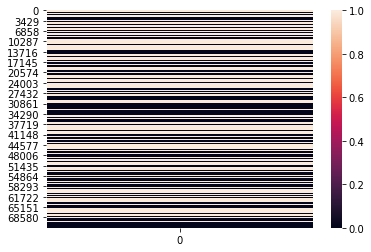

In [195]:
sns.heatmap(y_pred_test);

In [196]:
test_labels

array([1, 1, 0, ..., 1, 0, 0])

In [197]:
from sklearn.metrics import confusion_matrix

In [198]:
cm = confusion_matrix(test_labels, y_pred_test)
cm

array([[24642, 11358],
       [ 8232, 27768]])

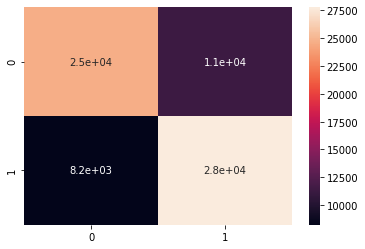

In [199]:
sns.heatmap(cm, annot=True);

In [200]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

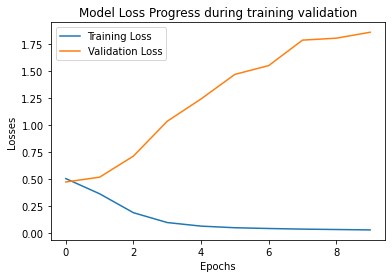

In [202]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss Progress during training validation")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend(["Training Loss", "Validation Loss"]);

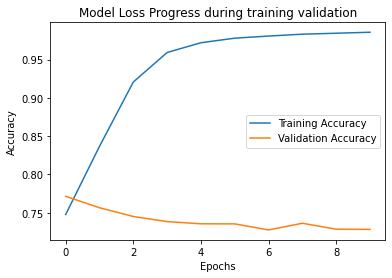

In [207]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Loss Progress during training validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"]);

In [210]:
text = "you are so funny"
text = tokenizer.encode(text)

In [211]:
text

[4280, 15268, 3918, 678]

In [213]:
Dcnn(np.array([text]), training=False).numpy()

array([[0.7469365]], dtype=float32)

In [214]:
text = "I hate you"
text = tokenizer.encode(text)

In [215]:
text

[52510, 52469, 64, 3293]

In [216]:
Dcnn(np.array([text]), training=False).numpy()

array([[1.7763492e-11]], dtype=float32)

In [217]:
text = "I love you so much"
text = tokenizer.encode(text)
text

[52510, 52469, 13, 4280, 3918, 14667]

In [218]:
Dcnn(np.array([text]), training=False).numpy()

array([[0.99999404]], dtype=float32)

In [219]:
print(Dcnn(np.array([text]), training=False).numpy())

[[0.99999404]]
